---
EDA ON  === Café Order Transactions Dataset
Transactional records and pricing for a snack café, ideal for retail analytics
---

---
About Dataset :
This dataset contains transactional records from a café specializing in popular Indian snacks like samosa, chai, lassi, and Mom’s Magic Biscuit. It includes two tables:

Order Details (order_items) – Records of customer orders with columns:

id (unique entry identifier)

order_id (order number)

product_id (item purchased)

quantity (number of items)

total (price × quantity)

Product Pricing (products) – Lists items and their fixed prices:

Item (product name)

Price (cost per unit)

AUTHOR : UNKNOWN

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the dataset
df_food = pd.read_csv("order_food.csv")

In [7]:
df_food.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7383 non-null   int64 
 1   order_id    7383 non-null   int64 
 2   product_id  7383 non-null   int64 
 3   quantity    7383 non-null   int64 
 4   total       7383 non-null   int64 
 5   updated_at  7383 non-null   object
 6   created_at  7383 non-null   object
dtypes: int64(5), object(2)
memory usage: 403.9+ KB


In [8]:
df_food.columns

Index(['id', 'order_id', 'product_id', 'quantity', 'total', 'updated_at',
       'created_at'],
      dtype='object')

In [9]:
#for full column display
pd.set_option('display.max_columns', None)

In [10]:
df_food.head()

,id,order_id,product_id,quantity,total,updated_at,created_at
0,15,10,2,1,15,2025-04-21 13:56:11,2025-04-21 13:56:11
1,16,10,3,2,20,2025-04-21 13:56:11,2025-04-21 13:56:11
2,17,11,2,2,30,2025-04-21 13:57:34,2025-04-21 13:57:34
3,18,11,3,2,20,2025-04-21 13:57:34,2025-04-21 13:57:34
4,19,12,2,2,30,2025-04-21 13:58:15,2025-04-21 13:58:15


In [11]:
# for checking null values
df_food.isnull().sum()/100

id            0.0
order_id      0.0
product_id    0.0
quantity      0.0
total         0.0
updated_at    0.0
created_at    0.0
dtype: float64

In [12]:
# for checking unique values in each column
df_food.nunique()

id            7383
order_id      3282
product_id      47
quantity        32
total           53
updated_at    3263
created_at    3263
dtype: int64

In [13]:
# for checking outliers
df_food.describe()

,id,order_id,product_id,quantity,total
count,7383.000000,7383.000000,7383.000000,7383.000000,7383.000000
mean,3714.249086,1635.118786,13.101449,2.009346,39.116213
std,2139.471157,954.601057,12.148382,2.392142,43.203645
min,15.000000,10.000000,2.000000,1.000000,5.000000
25%,1860.500000,792.500000,3.000000,1.000000,20.000000
50%,3714.000000,1619.000000,8.000000,1.000000,30.000000
75%,5568.500000,2478.000000,18.000000,2.000000,40.000000
max,7418.000000,3299.000000,52.000000,42.000000,1600.000000


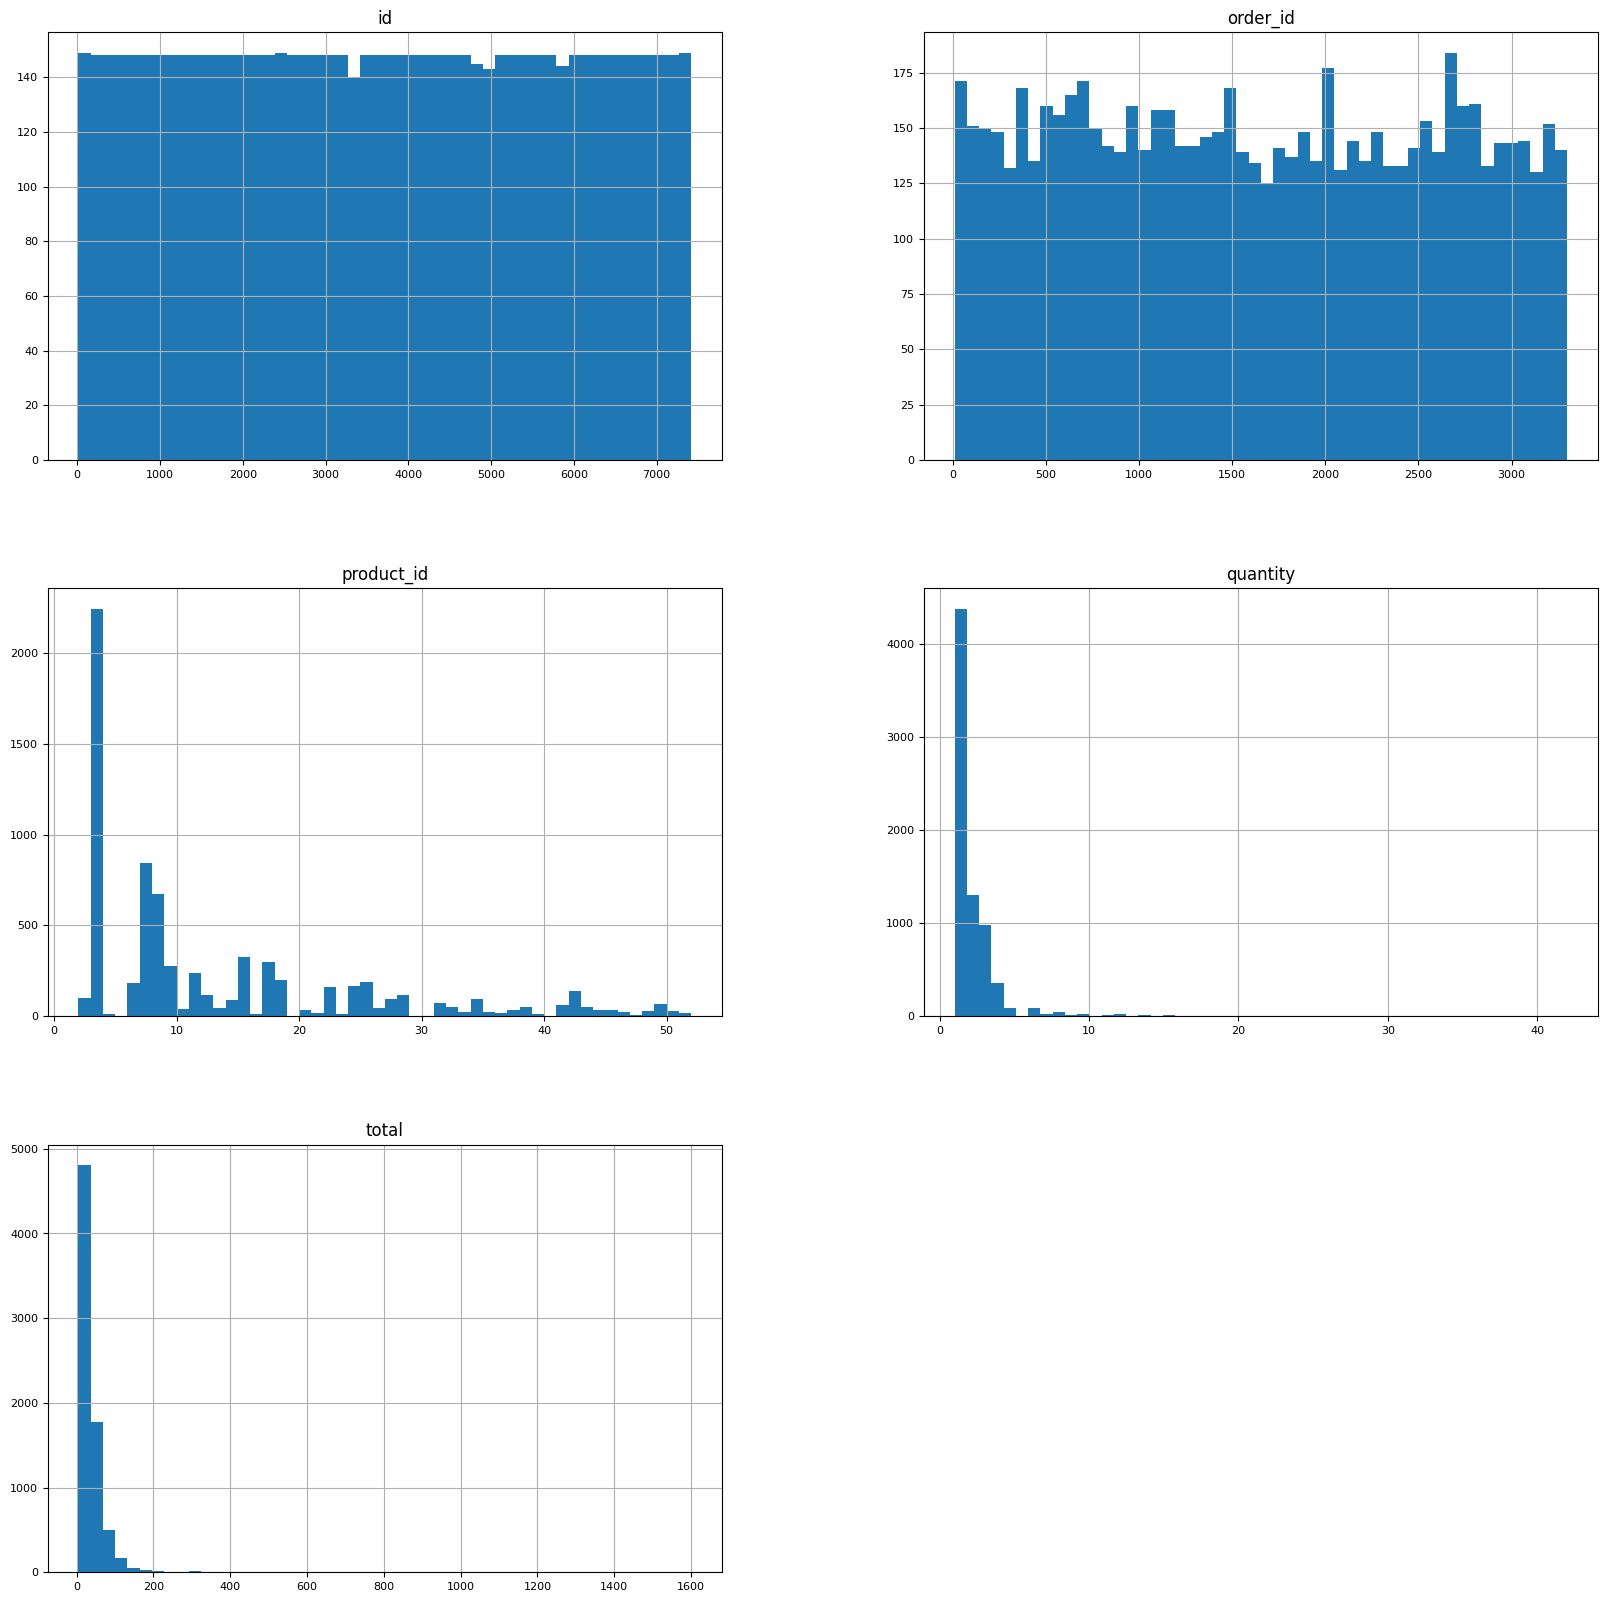

In [14]:
# for plotting histogram
df_food.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

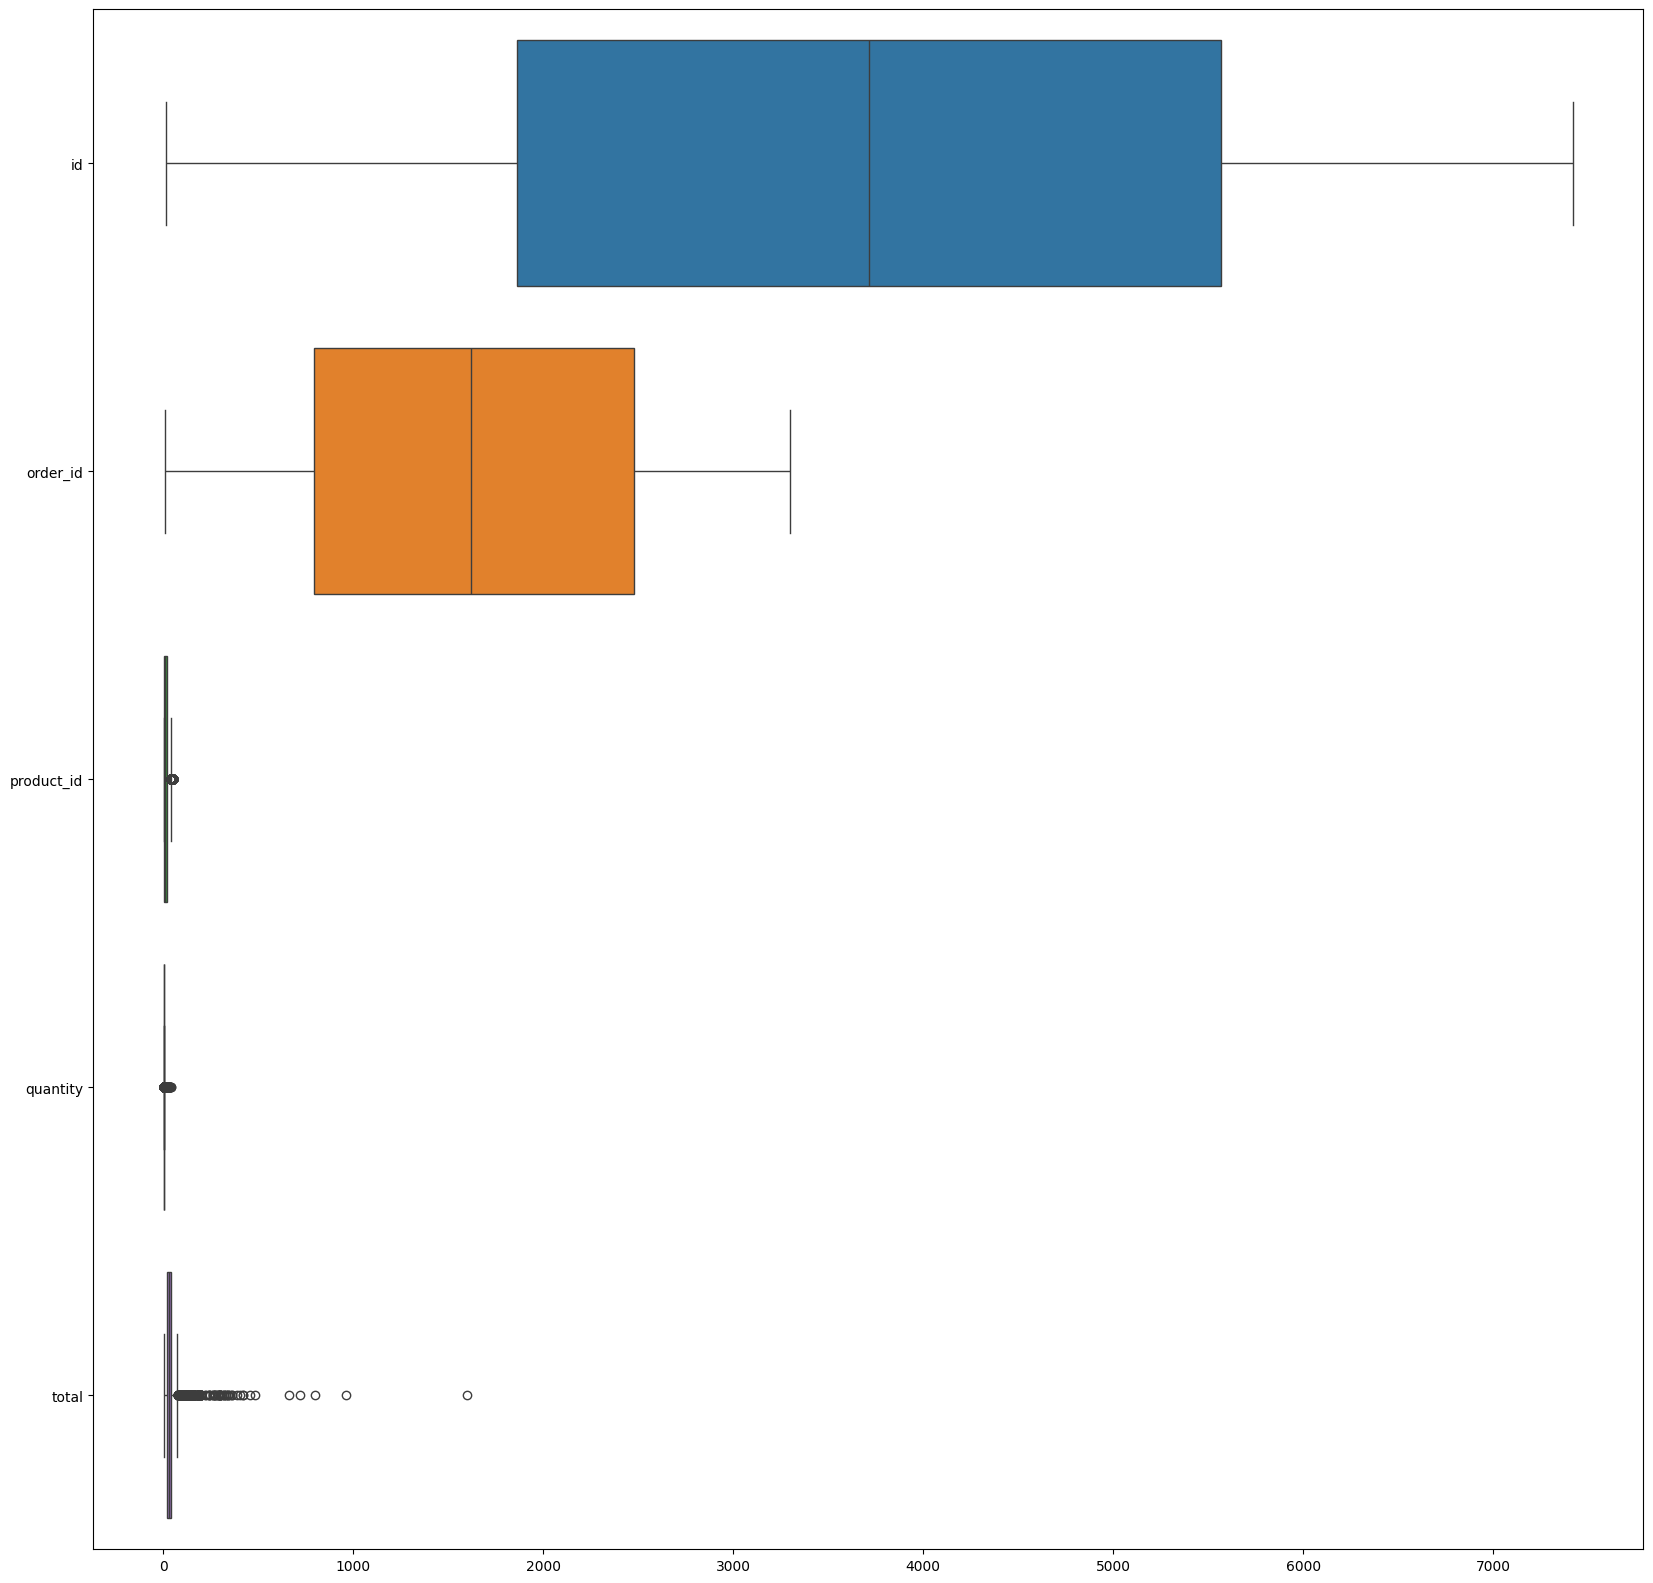

In [15]:
# for ploting boxplot
plt.figure(figsize=(20, 20))
sns.boxplot(data=df_food, orient='h')
plt.show()

In [16]:
top_products = df_food.groupby('product_id')['quantity'].sum().sort_values(ascending=False)
print(top_products)

product_id
3     7492
7     1270
8      754
9      724
15     416
17     344
11     288
22     260
2      222
28     221
18     220
6      215
24     205
25     196
27     167
12     162
42     161
43     113
21     106
34     104
41     104
37     101
49      94
14      93
31      89
38      70
26      58
20      51
32      50
10      49
13      45
45      45
44      36
50      34
4       34
39      31
16      29
23      29
48      28
46      23
52      22
33      21
35      21
36      15
51      13
47       6
40       4
Name: quantity, dtype: int64


In [17]:
revenue_by_product = df_food.groupby('product_id')['total'].sum().sort_values(ascending=False)
print(revenue_by_product)

product_id
3     74920
8     45240
25    19600
15    16640
7     12700
17    12040
9     10860
11    10080
6      7525
37     6060
22     5200
24     5125
39     4960
42     4830
28     4420
18     4400
49     4230
14     3720
31     3560
26     3480
50     3400
2      3330
12     2430
34     2080
10     1715
43     1695
27     1670
45     1350
20     1020
23     1015
32     1000
13      900
44      900
38      700
48      700
40      680
33      630
21      530
41      520
46      460
51      455
52      440
16      435
36      375
4       340
35      315
47      120
Name: total, dtype: int64


In [18]:
# Create a pivot table for product co-occurrence
pivot = pd.pivot_table(df_food, index='order_id', columns='product_id', values='quantity', fill_value=0)
corr = pivot.corr()
print(corr)

product_id        2         3         4         6         7         8   \
product_id                                                               
2           1.000000  0.115498  0.320434  0.099693  0.048220  0.008158   
3           0.115498  1.000000  0.004544  0.144909  0.354575  0.216338   
4           0.320434  0.004544  1.000000  0.179012  0.041578 -0.026460   
6           0.099693  0.144909  0.179012  1.000000  0.139199  0.083288   
7           0.048220  0.354575  0.041578  0.139199  1.000000  0.157724   
8           0.008158  0.216338 -0.026460  0.083288  0.157724  1.000000   
9           0.041895  0.272223 -0.013723  0.099467  0.318170  0.220249   
10         -0.014110  0.019335 -0.005382  0.005200  0.032201  0.023442   
11         -0.036743  0.168395 -0.014016  0.125785  0.152998  0.048533   
12         -0.025694  0.100626 -0.009801  0.041283  0.091354  0.107429   
13         -0.017208 -0.008307 -0.006564 -0.017026  0.001787 -0.001833   
14         -0.023417  0.081971 -0.0089

---
Here are 10 meaningful business insights from your café order transactions dataset, based on your EDA and analysis:



1. Top-Selling Products
The products with the highest total quantity sold are your most popular items. Focus on keeping these in stock and consider featuring them in promotions.

2. Highest Revenue Generators
Some products, even if not the most sold, contribute more to revenue due to higher prices. Prioritize these for upselling and special offers.

3. Order Size Patterns
The average number of items per order helps you understand customer purchasing behavior. If most orders are small, consider combo deals to increase order size.

4. Product Pairings
Correlation analysis shows which products are often bought together. Use this to create bundled offers (e.g., chai + samosa).

5. Outlier Orders
Boxplots and descriptive stats reveal unusually large orders. Investigate these for bulk buyers or possible data entry errors, and consider special pricing for bulk purchases.

6. Low-Performing Products
Products with low sales and revenue may need to be re-evaluated—consider removing them or promoting them differently.

7. Revenue Concentration
If a few products account for most of your revenue, your business is dependent on them. Diversify your offerings or promote other items to reduce risk.

8. Inventory Planning
Knowing which products sell most and which are often paired helps optimize inventory, reducing waste and stockouts.

9. Potential for Cross-Selling
Frequent product combinations indicate cross-selling opportunities at the point of sale (e.g., suggest lassi with samosa).

10. Customer Segmentation (if customer data available)
If you have customer IDs, you can identify high-value customers and target them with loyalty programs or personalized offers.

How to use these insights:

Design targeted promotions and combos
Optimize inventory and reduce costs
Increase average order value
Improve customer satisfaction and retention
Make data-driven menu decisions


